In [1]:
import my_module as mm
nets = []
convs = [8, 16, 32]
fcs = [128, 32]
device = mm.torch.device('cuda' if mm.torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [2]:
categories = [
    "anger",
    "surprise",
    "disgust",
    "fear",
    "neutral",
    "happiness",
    "sadness",
    "contempt"
]

# categories = [
#     "anger",
#     "surprise",
#     "disgust",
#     "fear",
#     "neutral",
#     "happiness",
#     "sad",
# ]

X, y = mm.read_pic(mm.pd.read_csv('data/legend.csv'), categories)
# X, y = mm.read_pic(mm.pd.read_csv('data/500_picts_satz.csv'), categories)
seed = 1234
Xtr, Xva, ytr, yva = mm.train_test_split(X, y, test_size=0.2, random_state=seed)
trainloader, testloader = mm.get_loader(Xtr, Xva, ytr, yva, batch_size = 4)
print("Done")

Done


In [3]:
lr_list = [0.001, 0.01, 0.03, 0.1, 0.3]
for lr in lr_list:
    nets.append(mm.Net(1, 350, 350, 8, convs, fcs))
    print(f'Done with a CNN that gonna work with learning rate = {lr}')

Done with a CNN that gonna work with learning rate = 0.001
Done with a CNN that gonna work with learning rate = 0.01
Done with a CNN that gonna work with learning rate = 0.03
Done with a CNN that gonna work with learning rate = 0.1
Done with a CNN that gonna work with learning rate = 0.3


In [5]:
count = 0
DIR_PATH = './model/'
mm.os.makedirs(DIR_PATH, exist_ok = True)
for net in nets:
    if mm.torch.cuda.is_available():
        net.cuda()
    net = mm.train_process2(device, net, trainloader, LR = lr_list[count], EPOCH = 2, PRINT = 100)
    count += 1
    PATH = DIR_PATH + "model_" + str(count) + ".pth"
    mm.torch.save(net.state_dict(), PATH)
    print(PATH, "done.")

CrossEntropyLoss()
[1,   100] loss: 1.894
[1,   200] loss: 1.857
[1,   300] loss: 1.892
[1,   400] loss: 1.854
[1,   500] loss: 1.899
[1,   600] loss: 1.849
[1,   700] loss: 1.869
[1,   800] loss: 1.862
[1,   900] loss: 1.819
[1,  1000] loss: 1.859
[1,  1100] loss: 1.854
[1,  1200] loss: 1.847
[1,  1300] loss: 1.842
[1,  1400] loss: 1.842
[1,  1500] loss: 1.864
[1,  1600] loss: 1.892
[1,  1700] loss: 1.882
[1,  1800] loss: 1.859
[1,  1900] loss: 1.844
[1,  2000] loss: 1.852
[1,  2100] loss: 1.882
[1,  2200] loss: 1.884
[1,  2300] loss: 1.842
[1,  2400] loss: 1.867
[1,  2500] loss: 1.867
[1,  2600] loss: 1.854
[1,  2700] loss: 1.824
[2,   100] loss: 1.874
[2,   200] loss: 1.839
[2,   300] loss: 1.832
[2,   400] loss: 1.842
[2,   500] loss: 1.882
[2,   600] loss: 1.864
[2,   700] loss: 1.874
[2,   800] loss: 1.862
[2,   900] loss: 1.857
[2,  1000] loss: 1.877
[2,  1100] loss: 1.804
[2,  1200] loss: 1.832
[2,  1300] loss: 1.907
[2,  1400] loss: 1.852
[2,  1500] loss: 1.862
[2,  1600] loss

In [6]:
training_error = []
testing_error = []
count = 0
for net in nets:
    if mm.torch.cuda.is_available():
        net.cuda()
    training_error.append(1 - mm.accuracy(device, net, trainloader))
    testing_error.append(1 - mm.accuracy(device, net, testloader))
    count += 1
    print("Done for model", count)

Done for model 1
Done for model 2
Done for model 3
Done for model 4
Done for model 5


[0.5867421475529584, 0.5867421475529584, 0.4962563915266618, 0.4962563915266618, 0.4962563915266618]
[0.5726807888970051, 0.5726807888970051, 0.5065741417092768, 0.5065741417092768, 0.5065741417092768]


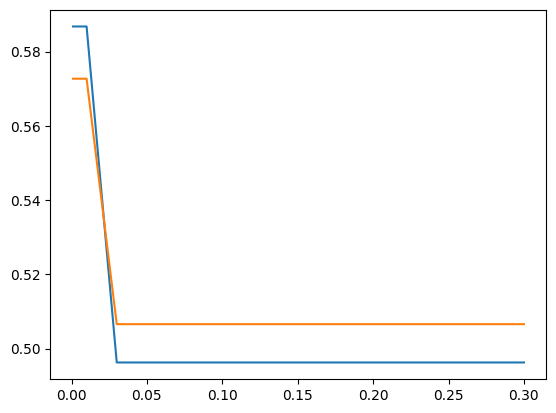

In [8]:
import matplotlib.pyplot as plt
from datetime import datetime

print(training_error)
print(testing_error)

plt.plot(lr_list, training_error, label="Training error")
plt.plot(lr_list, testing_error, label="Training error")

FIG_PATH = './plot/'
mm.os.makedirs(FIG_PATH, exist_ok = True)
current_time = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"on1000_{current_time}.png"
plt.savefig(FIG_PATH + filename)

CUDA out of memory with higher fliter:
OutOfMemoryError: CUDA out of memory. Tried to allocate 3.65 GiB. GPU 0 has a total capacty of 15.73 GiB of which 200.50 MiB is free. Process 377677 has 2.16 GiB memory in use. Process 442884 has 13.36 GiB memory in use. Of the allocated memory 12.82 GiB is allocated by PyTorch, and 327.44 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF